$\left[\begin{matrix}\sin{\left(\alpha \right)} \cos{\left(\beta \right)} & \frac{\cos{\left(\alpha \right)}}{R + r \cos{\left(\beta \right)}} & - \frac{\sin{\left(\alpha \right)} \sin{\left(\beta \right)}}{r}\\\cos{\left(\alpha \right)} \cos{\left(\beta \right)} & - \frac{\sin{\left(\alpha \right)}}{R + r \cos{\left(\beta \right)}} & - \frac{\sin{\left(\beta \right)} \cos{\left(\alpha \right)}}{r}\\\sin{\left(\beta \right)} & 0 & \frac{\cos{\left(\beta \right)}}{r}\end{matrix}\right]$


# Importe


In [267]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from IPython.display import display, Math
from sympy.abc import x, y, z, r, phi, alpha, R, theta, Q, a, rho

In [533]:
rc = sp.Symbol('r_c', positive=True)
R = sp.Symbol('R', positive=True, real=True)
r = sp.Symbol('r', positive=True, real=True)

dq = sp.Symbol('rho')
e0 = sp.Symbol('epsilon_0')

x = r*sp.sin(theta)*sp.cos(phi)
y = r*sp.sin(theta)*sp.sin(phi)
z = sp.cos(theta)*r

r_cart = sp.Matrix([x, y, z])
r_polar = sp.Matrix([r, theta, phi])

J = r_cart.jacobian(r_polar)

# Calculate 
det = J.det().simplify()

# Simplify result
display(J.det())
display(J.det().simplify())

sp.pprint(det)

r**2*sin(phi)**2*sin(theta)**3 + r**2*sin(phi)**2*sin(theta)*cos(theta)**2 + r**2*sin(theta)**3*cos(phi)**2 + r**2*sin(theta)*cos(phi)**2*cos(theta)**2

r**2*sin(theta)

 2       
r ⋅sin(θ)


In [534]:


r_pos = r_cart


r_charge = r_cart.subs([(theta,0), (phi,0),(r,rc)])

r_rel = r_charge-r_pos
sp.pprint(r_rel)
d = r_rel.transpose()*r_rel

⎡-r⋅sin(θ)⋅cos(φ)⎤
⎢                ⎥
⎢-r⋅sin(φ)⋅sin(θ)⎥
⎢                ⎥
⎣-r⋅cos(θ) + r_c ⎦


In [535]:

d_long = sp.sqrt(d[0])
sp.pprint(d_long)
sp.pprint(d_long)
d_sol = d_long.simplify()
display(d_sol)

   ______________________________________________________________
  ╱  2    2       2       2    2       2                       2 
╲╱  r ⋅sin (φ)⋅sin (θ) + r ⋅sin (θ)⋅cos (φ) + (-r⋅cos(θ) + r_c)  
   ______________________________________________________________
  ╱  2    2       2       2    2       2                       2 
╲╱  r ⋅sin (φ)⋅sin (θ) + r ⋅sin (θ)⋅cos (φ) + (-r⋅cos(θ) + r_c)  


sqrt(r**2 - 2*r*r_c*cos(theta) + r_c**2)

In [536]:
dphi=1/(4*sp.pi*e0*d_sol)*det*dq

In [550]:
sym_F = sp.integrals.Integral(dphi, (theta, 0, sp.pi), (phi, 0, 2*sp.pi))

F = sym_F.doit()

rel = sp.Symbol('r_{el}')
pot = F.subs([(r,R)]).expand().simplify()

display(sp.factor(F.subs([(r,R)])))

sub1 = sp.sqrt(R**2-2*R*rc+rc**2)
sub2 = sp.sqrt(R**2+2*R*rc+rc**2)

rel = rc-R

res_pot1 = pot.subs([(sub1,(-rel)), (sub2,(2*R+rel))]).simplify()
res_pot2 = pot.subs([(sub1,(rel)), (sub2,(2*R+rel))]).simplify()


sp.pprint(res_pot1)
sp.pprint(res_pot2)

R*rho*(-sqrt(R**2 - 2*R*r_c + r_c**2) + sqrt(R**2 + 2*R*r_c + r_c**2))/(2*epsilon_0*r_c)

R⋅ρ
───
 ε₀
  2   
 R ⋅ρ 
──────
ε₀⋅r_c


In [538]:
rho = Q/(4*sp.pi*R**2)

AttributeError: module 'sympy' has no attribute 'abs'

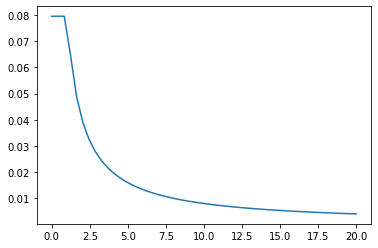

In [531]:
# Matplotlib
values = [(dq, rho),(e0,1),(R,1),(Q,1)]
phi_plot1 = res_pot1.subs(values)
phi_plot2 = res_pot2.subs(values)

phi_plot = lambda r: phi_plot1 if r < 1 else phi_plot2.subs(rc, r)


rc_vals = np.linspace(0,20,50)

pot_std = pot/Q

pot_vals = [phi_plot(r) for r in rc_vals]

ax = plt.plot(rc_vals, pot_vals)